In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

## 7.1 Effects of interpolation techniques in Image Resizing

In [5]:
# Read image
grid_image = cv2.imread("./Grid_Image.JPG")

In [83]:
# Define resize factor

# [2, 4, 5, 7, 8, 10, 15]
Reduce_factors = [2, 4, 10] # อย่างน้อย 3 ค่า
# Scale_factors = 1 / Reduce_factors

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

grid_images_resized = []

for factor in Reduce_factors:

  tmp_grid = []

  for inter in inter_methods:
    # print(factor, inter)

    height, width, channels = grid_image.shape
    # print(height, width)
    dsize = (int(height * ( 1/factor )), int(width * ( 1/factor )))
    new_image = cv2.resize(grid_image, dsize=dsize, interpolation=inter)
    tmp_grid.append(new_image)
    
  grid_images_resized.append(tmp_grid)

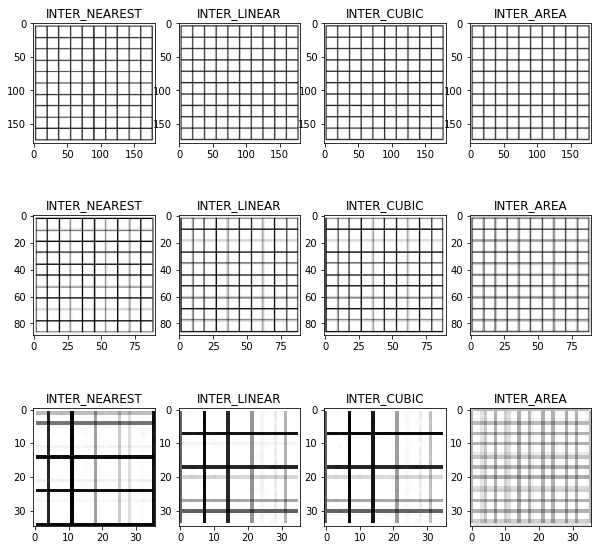

In [84]:
plt.figure(figsize=(10,10))

for i, _ in enumerate(Reduce_factors):
    plt.subplot(3, 4, 1+(4*i))
    plt.title("INTER_NEAREST")
    plt.imshow(grid_images_resized[i][0])
    plt.subplot(3, 4, 2+(4*i))
    plt.title("INTER_LINEAR")
    plt.imshow(grid_images_resized[i][1])
    plt.subplot(3, 4, 3+(4*i))
    plt.title("INTER_CUBIC")
    plt.imshow(grid_images_resized[i][2])
    plt.subplot(3, 4, 4+(4*i))
    plt.title("INTER_AREA")
    plt.imshow(grid_images_resized[i][3])

In [85]:
# Read image
image = cv2.imread("./image.jpg")

In [86]:
# Define resize factor

# [2, 4, 5, 7, 8, 10, 15]
Reduce_factors = [2, 4, 5] # อย่างน้อย 3 ค่า
# Scale_factors = 1 / Reduce_factors

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

images_resized = []

for factor in Reduce_factors:

  tmp = []

  for inter in inter_methods:
    # print(factor, inter)

    height, width, channels = image.shape
    # print(height, width)
    dsize = (int(height * ( 1/factor )), int(width * ( 1/factor )))
    new_image = cv2.resize(image, dsize=dsize, interpolation=inter)
    tmp.append(new_image)
    
  images_resized.append(tmp)

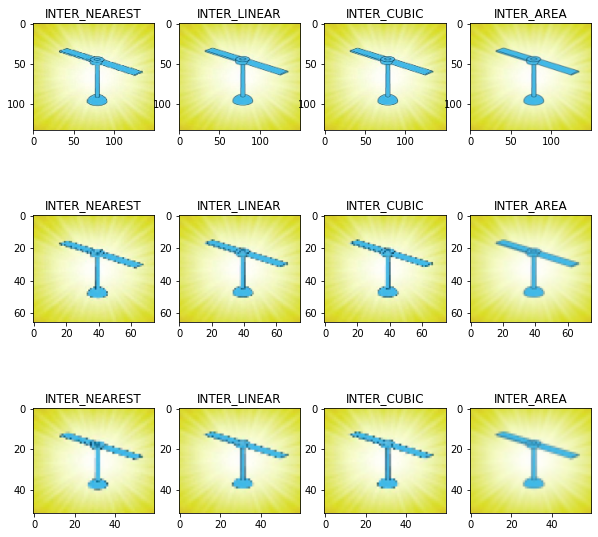

In [87]:
plt.figure(figsize=(10,10))
for i, _ in enumerate(Reduce_factors):
    plt.subplot(3, 4, 1+(4*i))
    plt.title("INTER_NEAREST")
    plt.imshow(images_resized[i][0])
    plt.subplot(3, 4, 2+(4*i))
    plt.title("INTER_LINEAR")
    plt.imshow(images_resized[i][1])
    plt.subplot(3, 4, 3+(4*i))
    plt.title("INTER_CUBIC")
    plt.imshow(images_resized[i][2])
    plt.subplot(3, 4, 4+(4*i))
    plt.title("INTER_AREA")
    plt.imshow(images_resized[i][3])

## 7.2 IMAGE AUGMENTATION USING KERAS IMAGEDATAGENERATOR

In [89]:
# Read image
image2 = cv2.imread("./image.jpg")
image2 = cv2.resize(image, (224, 224))
# image2 = image2[:,:,0]
image2 = image2.reshape((1,) + image2.shape)

In [82]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

print(image2.shape)
frame_rate = 5
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('w8_out.mp4', fourcc, frame_rate, (224,224))

# Define parameters

Npic = 15
rotation_range = 90
width_shift_range = 0.5
height_shift_range = 0.5
shear_range = 0.2
zoom_range = 0.5
horizontal_flip = True

# Define ImageDataGenerator with parameters
for m in fill_method:
  datagen = ImageDataGenerator( rotation_range=rotation_range,
                                width_shift_range=width_shift_range,
                                height_shift_range=height_shift_range,
                                shear_range=shear_range,
                                zoom_range=zoom_range,
                                horizontal_flip=horizontal_flip,
                                fill_mode = m
                              )

  # Creates our batch of one image
  pic = datagen.flow(image2, batch_size = 1)
  # pic = datagen.flow(image2, batch_size= 1,save_to_dir='./test', save_prefix='x',save_format='jpg')
  # Random generate transformed images and write to a video file
  for i in range(1, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    writer.write(im_result)

writer.release()
# print("Hello")

(1, 224, 224, 3)


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
